# Wykrywanie naczyń dna oka

## Imports

In [120]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, exposure
from skimage.transform import rescale
from skimage.filters import unsharp_mask, frangi, hessian, sato

## Constants

In [121]:
ORIGINAL_PHOTO_NAME = "photos/Image_13L.jpg"

## Functions

In [122]:
def loadPicture(file):
    img = cv2.imread(file)
    img = cv2.resize(img, (400, 400), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img

In [123]:
def showPictures(leftPicture, rightPicture):
    fig = plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(leftPicture)
    plt.subplot(1, 2, 2)
    plt.imshow(rightPicture, cmap='gray')

In [124]:
def pretreatment(picture, optionNumbers):
    for num in optionNumbers:
        if num==0:
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
        elif num==1:
            picture = cv2.medianBlur(picture, 3)
        elif num==2:
            picture = unsharp_mask(picture, radius=5, amount=1)
        elif num==3:
            picture = cv2.Canny(picture, 100, 100)
        elif num==4:
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2HSV)
        elif num==5:
            pass
        elif num==6:
            pass
        elif num==7:
            pass
        elif num==8:
            pass
        elif num==9:
            pass
        else:
            None
    return picture

In [125]:
def treatment(picture):
    picture = sato(picture)
    return picture

## Main

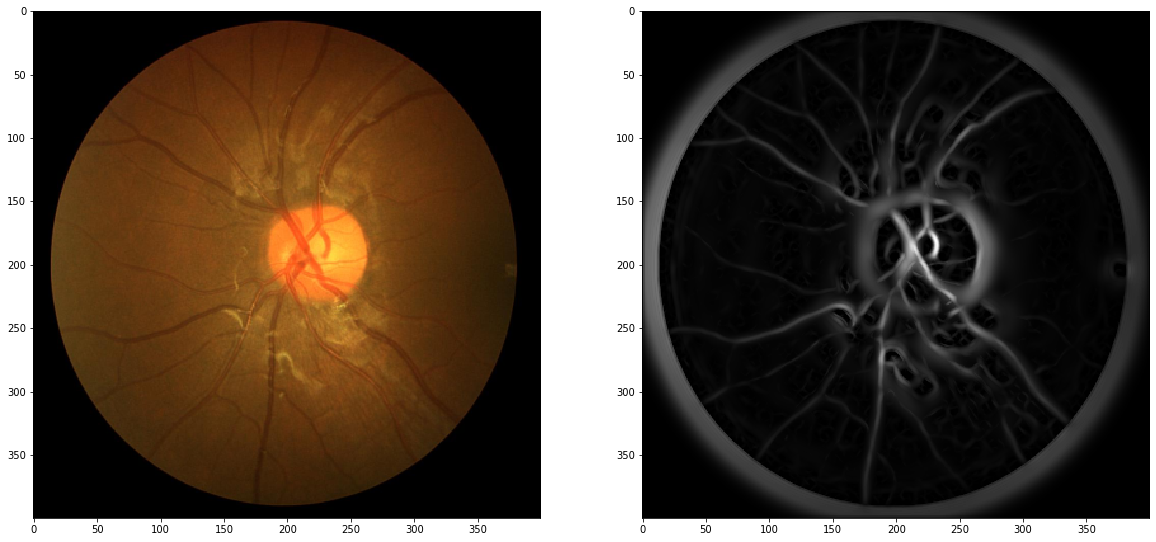

In [126]:
originalPicture = loadPicture(ORIGINAL_PHOTO_NAME)
preparePicture = pretreatment(originalPicture, [0, 1, 2])
resultPicture = treatment(preparePicture)

showPictures(originalPicture, resultPicture)